In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '2'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

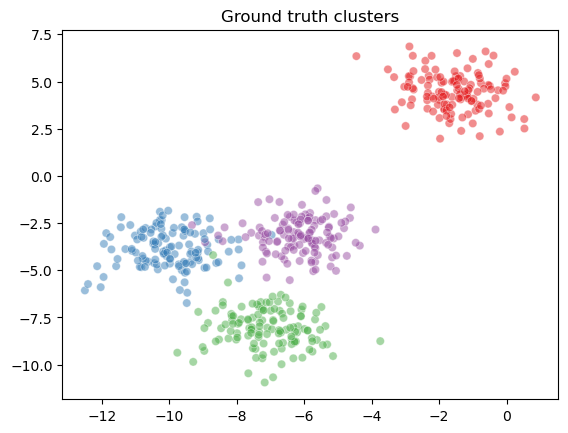

In [11]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', alpha=.5)
plt.legend().remove()
plt.title('Ground truth clusters')
plt.show()

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [126]:
def k_means_clustering(X, n_clusters):
    # Perform K-means clustering
    clusterer = KMeans(n_clusters=n_clusters, n_init=10)
    y_pred = clusterer.fit_predict(X)

    # Set up subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

    # Define a consistent color palette
    palette = sns.color_palette('Set1', n_clusters)

    # Plot K-means clustering results
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette=palette, alpha=.5, ax=ax1)
    ax1.legend().remove()
    ax1.set_title('Results of K-means clustering')

    # Calculate silhouette score and silhouette samples
    score = silhouette_score(X, y_pred)
    sample_metrics = silhouette_samples(X, y_pred)
    clustered_metrics = []

    # Collect silhouette samples for each cluster
    for cluster_num in range(n_clusters):
        clustered_metrics.append(sample_metrics[y_pred == cluster_num])

    # Plot silhouette analysis
    for cluster_num in range(n_clusters):
        clustered_metrics[cluster_num].sort()
        sns.lineplot(
            y=np.arange(clustered_metrics[cluster_num].shape[0]), 
            x=clustered_metrics[cluster_num], 
            color=palette[cluster_num], 
            ax=ax2
        )

    ax2.set_title('Silhouette analysis')
    ax2.axvline(x=score, color='black', ls='--')
    fig.suptitle(f'K = {n_clusters}')
    plt.tight_layout()
    plt.show()

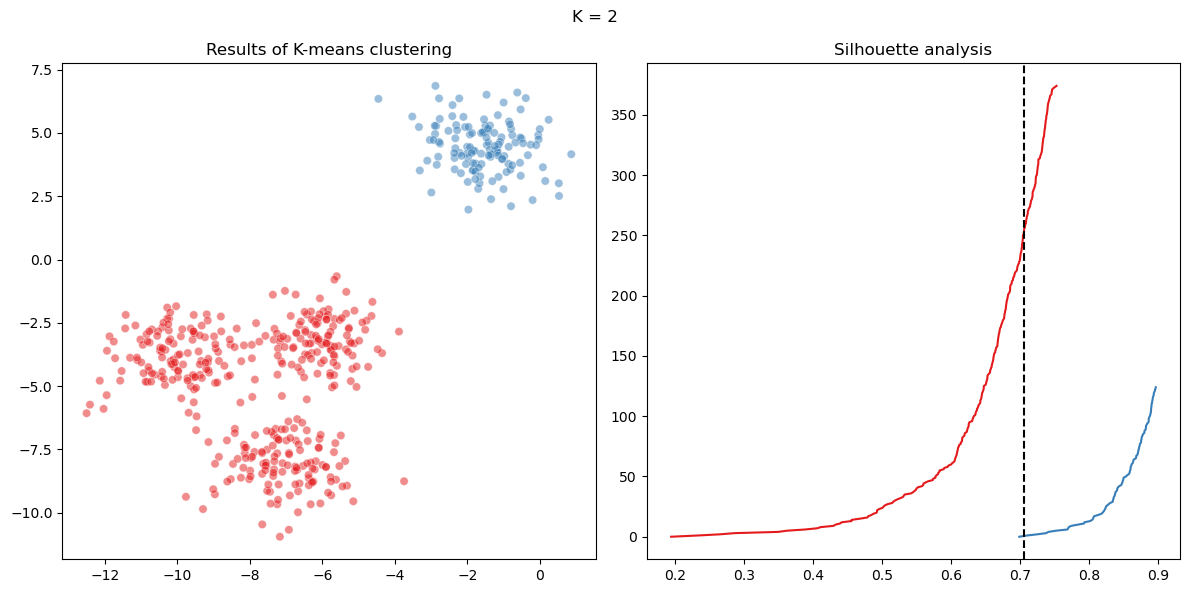

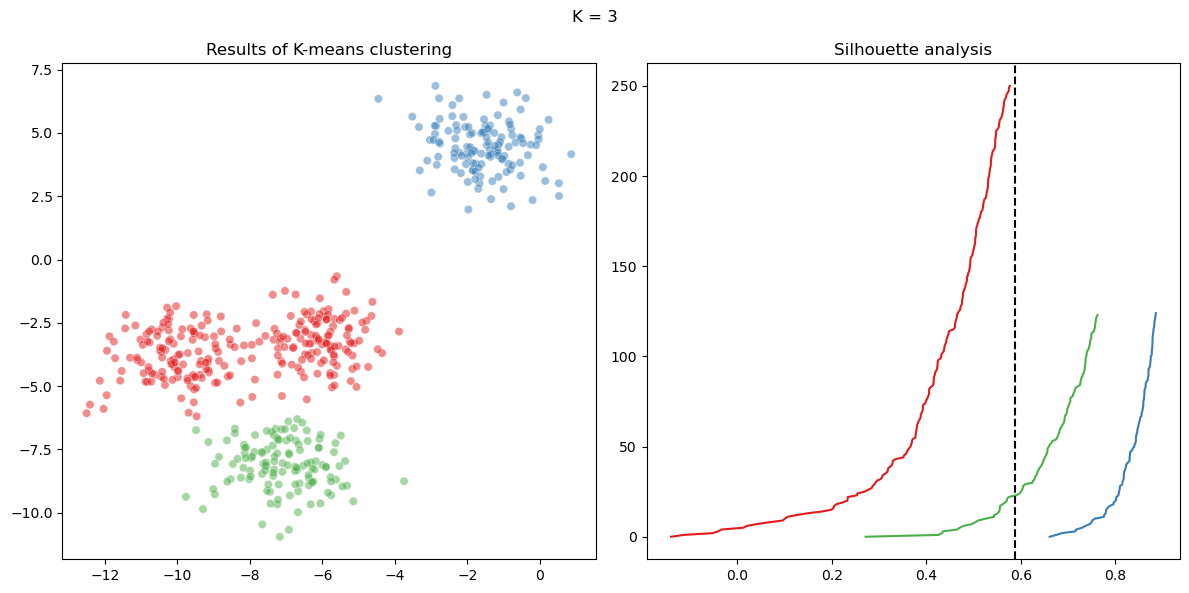

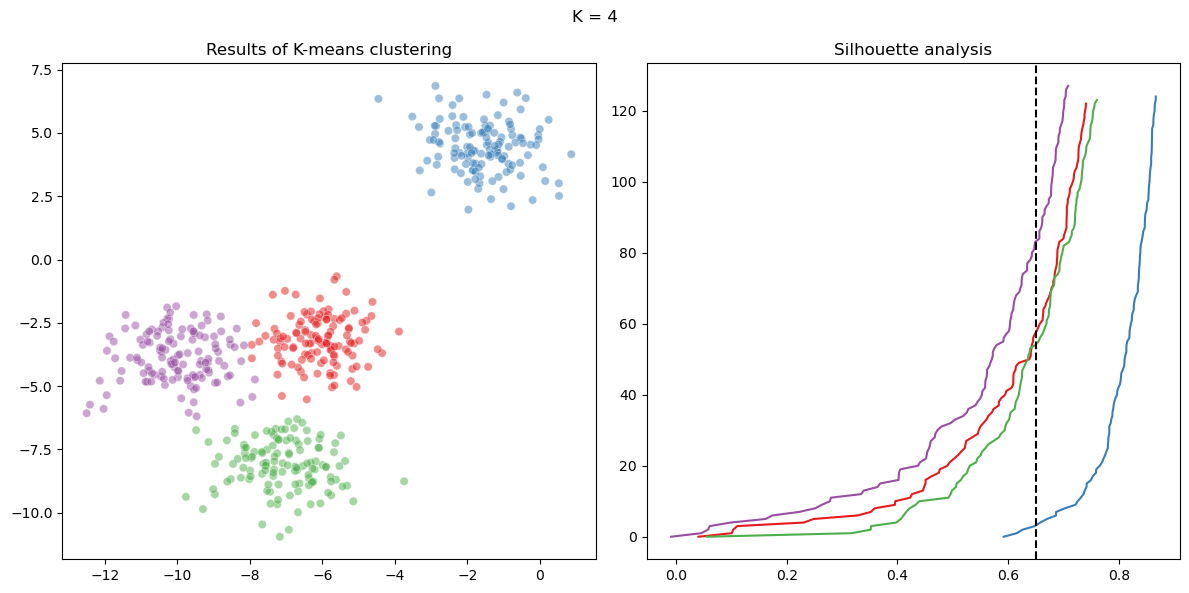

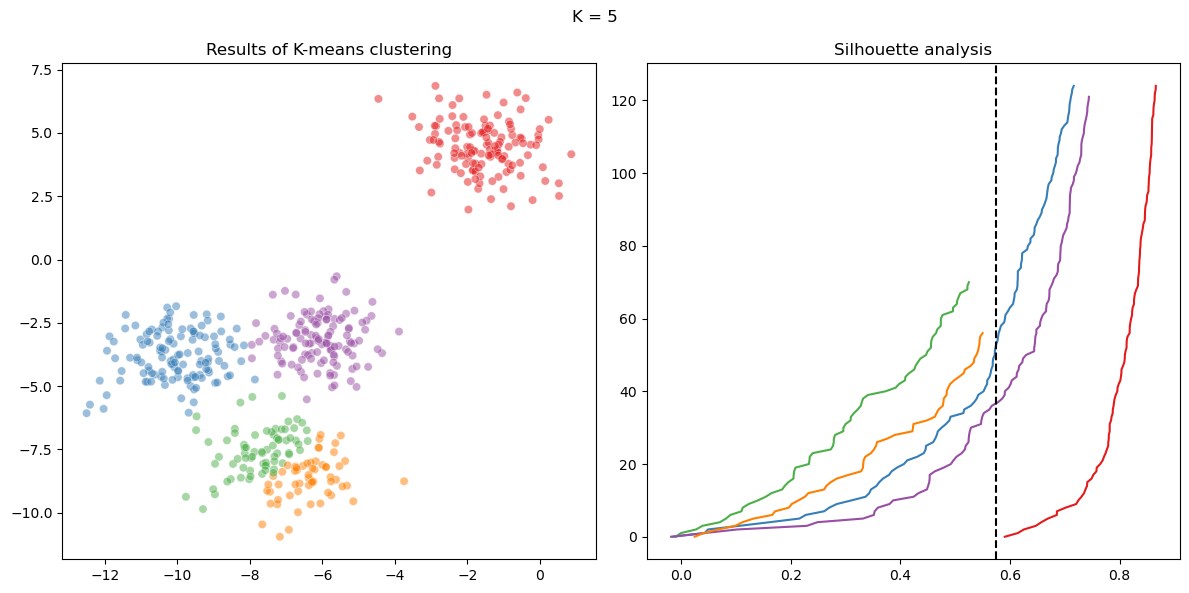

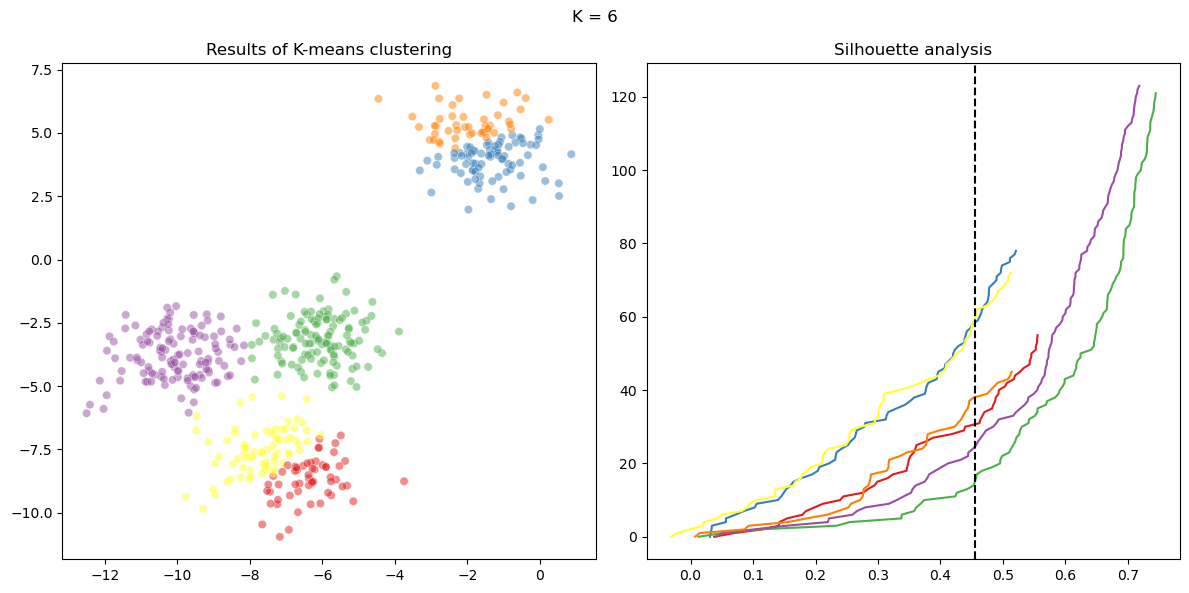

In [127]:
for k in [2, 3, 4, 5, 6]:
    k_means_clustering(X, k)